In [151]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

roc_curve = RocCurveDisplay.from_estimator

# 4
Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifer on the training data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

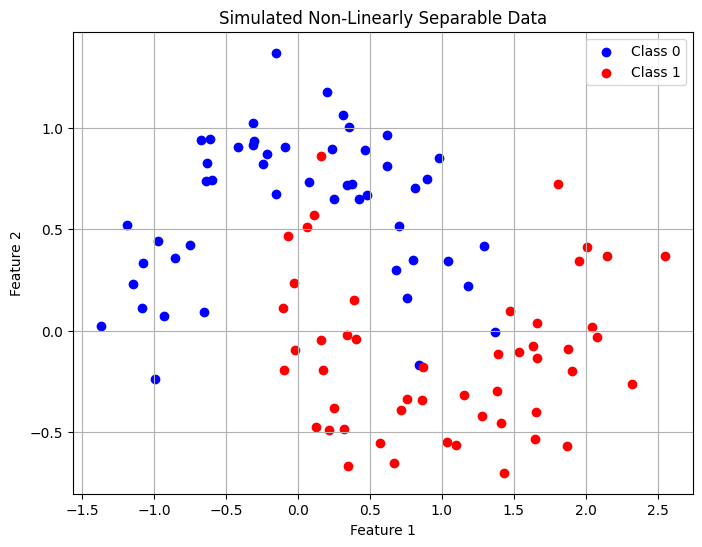

In [2]:
# Generate dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
plt.title("Simulated Non-Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


In [8]:
(X_train,
X_test,
y_train,
y_test) = skm.train_test_split(X,
y,
test_size=0.5,
random_state=0)

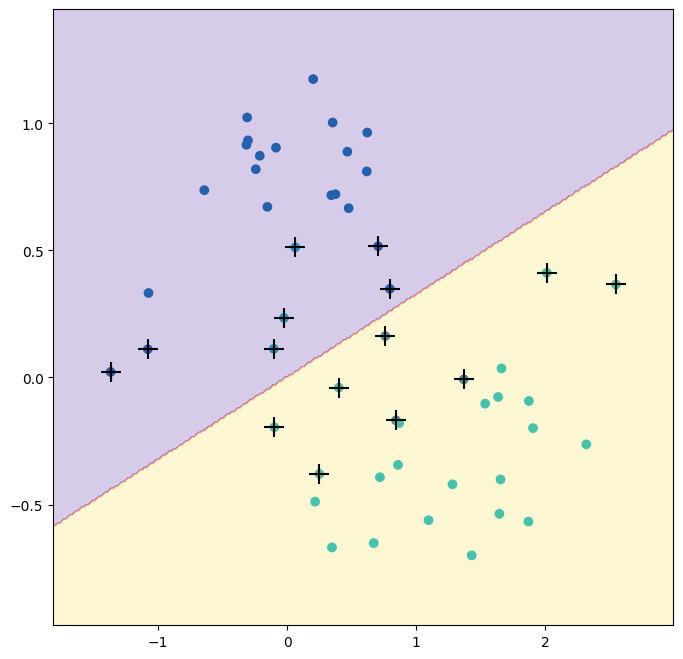

In [12]:
## Decision Boundary is linear
## Support vectors are marked with the + 

svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
y_train,
svm_linear,
ax=ax)

In [14]:
## Here we see that there are 7 misclassifications with the linear SVC approach (untuned C)

y_test_hat = svm_linear.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,0,1
Predicted,,
0,24,5
1,2,19


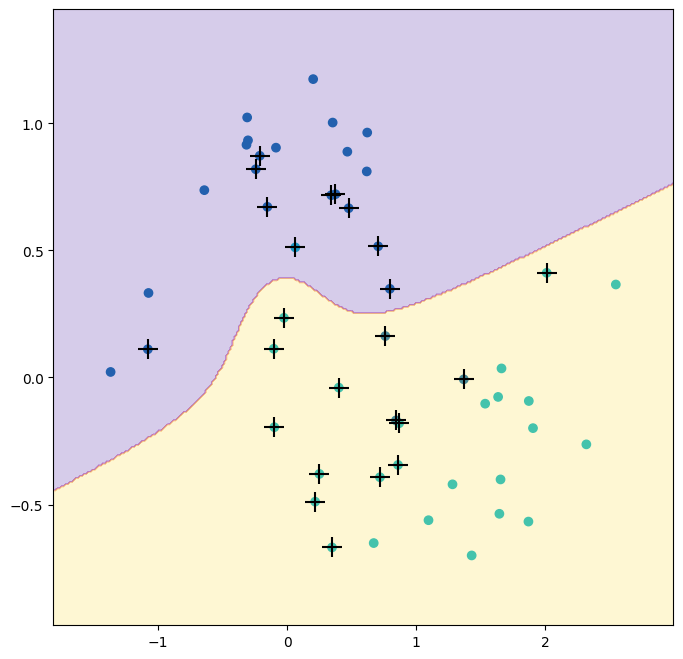

In [21]:
## Randomly split into training and testing groups
## Fit using a radial kernel and an gamma = 1

svm_poly = SVC(kernel="poly", degree=3, C=1)
svm_poly.fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
y_train,
svm_poly,
ax=ax)

In [22]:
## Here we see that there are 6 misclassifications with the polynomial SVM approach (untuned C)

y_test_hat = svm_poly.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,0,1
Predicted,,
0,24,4
1,2,20


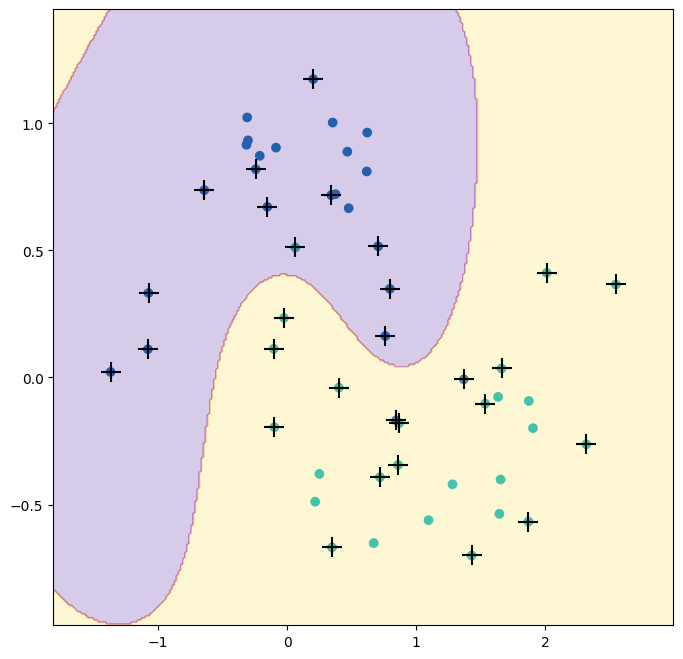

In [31]:
## Randomly split into training and testing groups
## Fit using a radial kernel and an gamma = 1

svm_rbf = SVC(kernel="rbf", gamma=2, C=.5)
svm_rbf.fit(X_train, y_train)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
y_train,
svm_rbf,
ax=ax)

In [32]:
## Here we see that there are 3 misclassifications with the radial SVM approach (untuned C)
## There is a clear advantage to using a polynomial or radial kernal when dealing with non-linear data, as shown by the test error rates.

y_test_hat = svm_rbf.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,0,1
Predicted,,
0,26,3
1,0,21


# 5
We have seen that we can ft an SVM with a non-linear kernel in order
to perform classifcation using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

### a

Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary
between them. For instance, you can do this as follows:

In [33]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

### b
Plot the observations, colored according to their class labels.
Your plot should display X1 on the x-axis, and X2 on the yaxis.

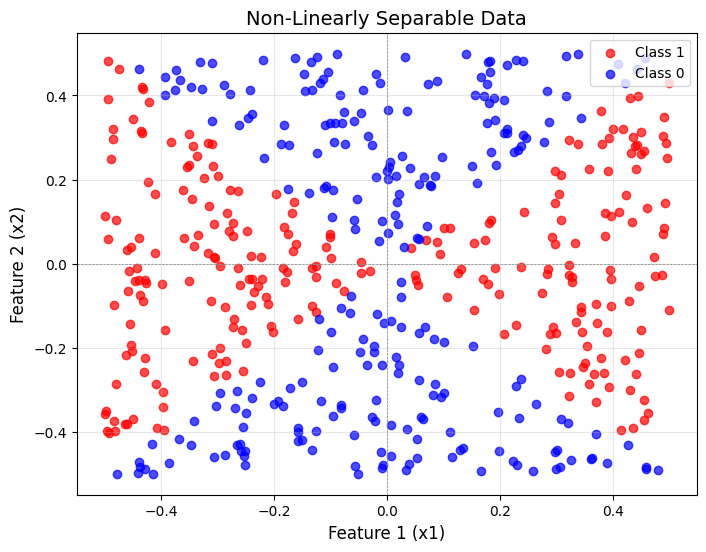

In [35]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x1[y], x2[y], color='red', label='Class 1', alpha=0.7)
plt.scatter(x1[~y], x2[~y], color='blue', label='Class 0', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Non-Linearly Separable Data", fontsize=14)
plt.xlabel("Feature 1 (x1)", fontsize=12)
plt.ylabel("Feature 2 (x2)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### c

Fit a logistic regression model to the data, using X1 and X2 as
predictors.

In [43]:
## Create Dataframe from distinct variables

rand_df = pd.DataFrame()

rand_df['x1'] = x1
rand_df['x11'] = x1**2
rand_df['x2'] = x2
rand_df['x22'] = x2**2
rand_df['inter'] = x1*x2
rand_df['y'] = y

X = rand_df.drop(columns=['y'])

display(rand_df)

,x1,x11,x2,x22,inter,y
0,0.305003,0.093027,-0.256576,0.065831,-0.078257,True
1,0.307941,0.094828,0.211346,0.044667,0.065082,True
2,0.015326,0.000235,0.208829,0.043610,0.003200,False
3,-0.214199,0.045881,-0.078177,0.006112,0.016745,True
4,-0.446069,0.198978,-0.040580,0.001647,0.018101,True
...,...,...,...,...,...,...
495,-0.094687,0.008966,0.289493,0.083806,-0.027411,False
496,-0.259470,0.067324,-0.444608,0.197676,0.115362,False
497,-0.080933,0.006550,-0.335240,0.112386,0.027132,False
498,0.181635,0.032991,0.382872,0.146591,0.069543,False


### d

 Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be linear.

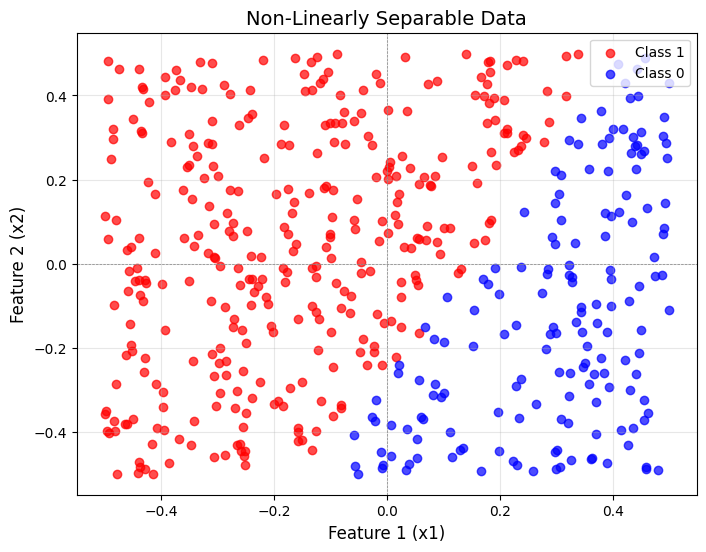

In [50]:
X_base = X.drop(columns=['x11', 'x22', 'inter'])

log_reg = LogisticRegression().fit(X_base, y)

pred_y = log_reg.predict(X_base)

rand_df['pred_y'] = pred_y

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x1[pred_y], x2[pred_y], color='red', label='Class 1', alpha=0.7)
plt.scatter(x1[~pred_y], x2[~pred_y], color='blue', label='Class 0', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Non-Linearly Separable Data", fontsize=14)
plt.xlabel("Feature 1 (x1)", fontsize=12)
plt.ylabel("Feature 2 (x2)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### e

 Now ft a logistic regression model to the data using non-linear
functions of X1 and X2 as predictors (e.g. X2
1 , X1×X2, log(X2),
and so forth).

### f

 Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The
decision boundary should be obviously non-linear. If it is not,
then repeat (a)–(e) until you come up with an example in which
the predicted class labels are obviously non-linear.

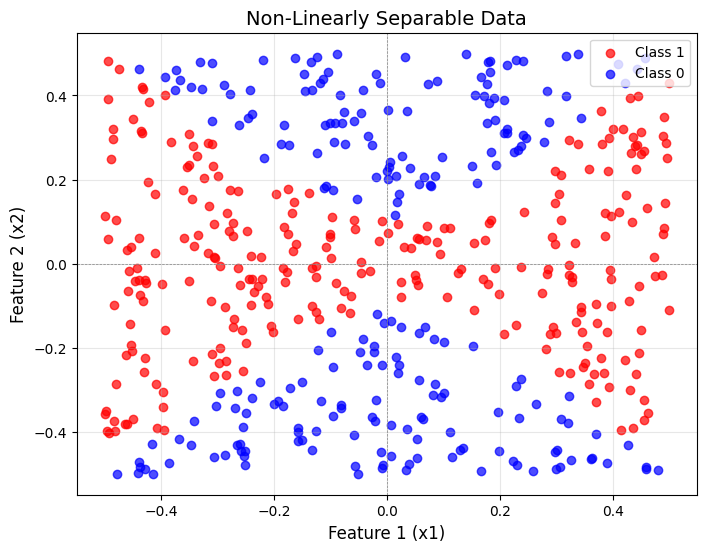

In [51]:
log_reg = LogisticRegression().fit(X, y)

pred_y = log_reg.predict(X)

rand_df['pred_y'] = pred_y

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x1[pred_y], x2[pred_y], color='red', label='Class 1', alpha=0.7)
plt.scatter(x1[~pred_y], x2[~pred_y], color='blue', label='Class 0', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("Non-Linearly Separable Data", fontsize=14)
plt.xlabel("Feature 1 (x1)", fontsize=12)
plt.ylabel("Feature 2 (x2)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### g

Fit a support vector classifer to the data with X1 and X2 as
predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted
class labels.

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


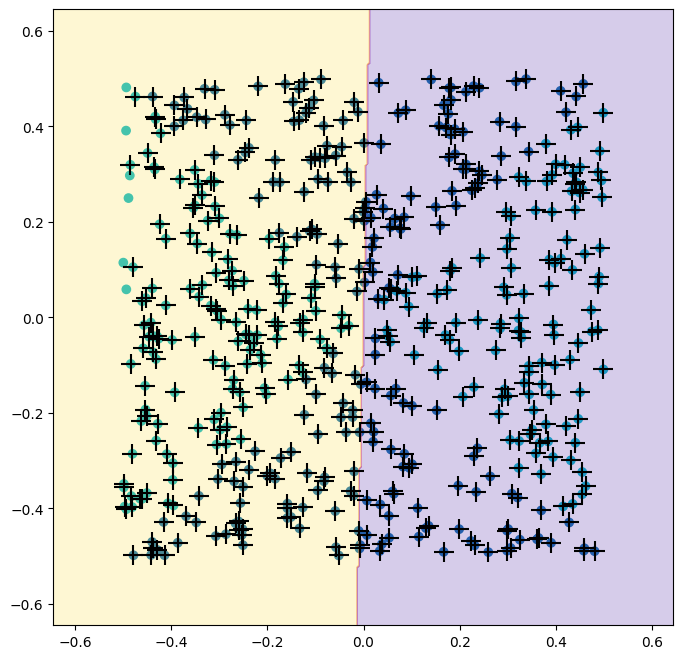

In [52]:
## Decision Boundary is linear
## Support vectors are marked with the + 

svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_base, y)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_base,
y,
svm_linear,
ax=ax)

### h
Fit a SVM using a non-linear kernel to the data. Obtain a class
prediction for each training observation. Plot the observations,
colored according to the predicted class labels.

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


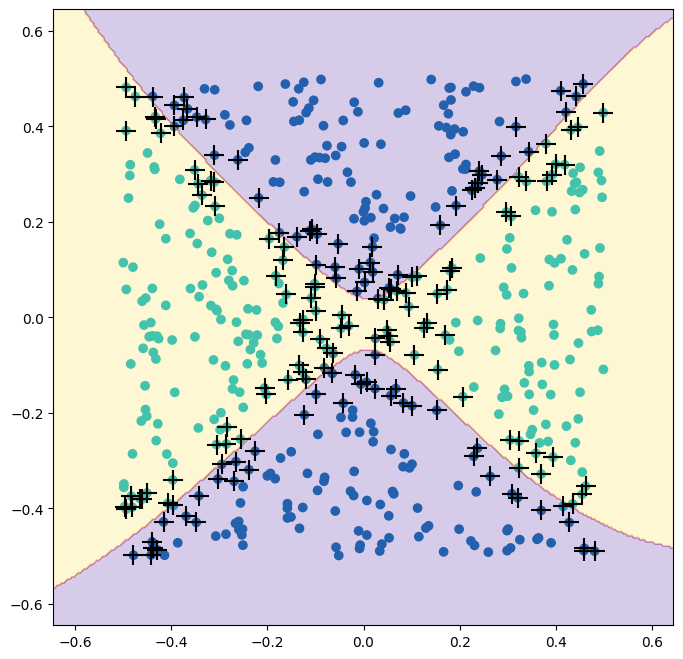

In [59]:
## Randomly split into training and testing groups
## Fit using a radial kernel and an gamma = 1

svm_rbf = SVC(kernel="rbf", gamma=5, C=1)
svm_rbf.fit(X_base, y)

fig, ax = subplots(figsize=(8,8))
plot_svm(X_base,
y,
svm_rbf,
ax=ax)

### i

Comment on your results.

Nothing is exceptionally surprising except this a good example of how the gamma factor in SVM for the radial kernel is so important. Higher levels of gamma are better in this case because we are requring a small boundary (typically around the point (0,0)

# 6

At the end of Section 9.6.1, it is claimed that in the case of data that is
just barely linearly separable, a support vector classifer with a small
value of C that misclassifes a couple of training observations may
perform better on test data than one with a huge value of C that does
not misclassify any training observations. You will now investigate
this claim.

### a 
Generate two-class data with p = 2 in such a way that the classes
are just barely linearly separable

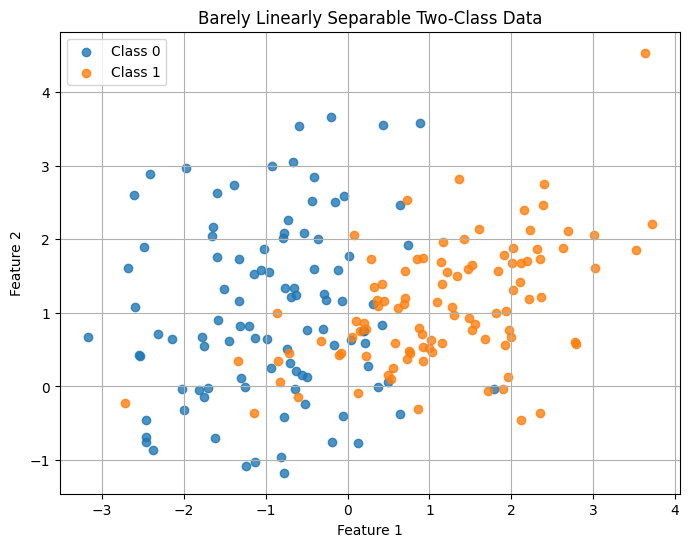

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a dataset
X, y = make_classification(
    n_samples=200,         # Number of samples
    n_features=2,          # Number of features
    n_informative=2,       # Number of informative features
    n_redundant=0,         # No redundant features
    n_clusters_per_class=1,
    class_sep=1.05,        # Separation between the classes
    flip_y=0,              # No label noise
    random_state=42
)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.8)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.8)
plt.legend()
plt.title("Barely Linearly Separable Two-Class Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


### b
 Compute the cross-validation error rates for support vector
classifers with a range of C values. How many training observations are misclassifed for each value of C considered, and how
does this relate to the cross-validation errors obtained?

In [65]:
## Here we tune it using 5-fold CV, to find a proper value for C

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
grid.cv_results_

{'mean_fit_time': array([0.00158696, 0.00193133, 0.00190816, 0.00320511, 0.00099983,
        0.0012002 , 0.00270286]),
 'std_fit_time': array([4.83751177e-04, 4.42829368e-04, 1.96279149e-04, 2.69625876e-03,
        1.19304619e-06, 4.00187641e-04, 3.99651972e-04]),
 'mean_score_time': array([0.00060821, 0.00100183, 0.00070095, 0.00060024, 0.00040021,
        0.00020008, 0.00020022]),
 'std_score_time': array([4.96663476e-04, 4.05171314e-06, 3.96693869e-04, 4.90096692e-04,
        4.90154913e-04, 4.00161743e-04, 4.00447845e-04]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.925, 0.925, 0.925, 0.925, 0.925, 0.925, 0.925]),
 'split1_test_score': array([0.875, 0.85 , 0.85 , 0.85 , 0.85 , 0.85 , 0.85 ]),
 'split2_tes

### c

 Generate an appropriate test data set, and compute the test
errors corresponding to each of the values of C considered. Which
value of C leads to the fewest test errors, and how does this
compare to the values of C that yield the fewest training errors
and the fewest cross-validation errors?

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Print the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 140 samples
Test set size: 60 samples


In [68]:
## Predict class labels on these test observations 
## 70% of test observations are correctly classified

svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,0,1
Predicted,,
0,29,4
1,5,22


In [70]:
for c in [0.001,0.01,0.1,1,5,10,100]:
    svm_linear = SVC(C=c, kernel='linear')
    svm_linear.fit(X_train, y_train)
    y_test_hat = svm_linear.predict(X_test)
    print('---------------------------')
    print(c)
    display(confusion_table(y_test_hat, y_test))

---------------------------
0.001


Truth,0,1
Predicted,,
0,0,0
1,34,26


---------------------------
0.01


Truth,0,1
Predicted,,
0,28,2
1,6,24


---------------------------
0.1


Truth,0,1
Predicted,,
0,28,1
1,6,25


---------------------------
1


Truth,0,1
Predicted,,
0,28,1
1,6,25


---------------------------
5


Truth,0,1
Predicted,,
0,28,1
1,6,25


---------------------------
10


Truth,0,1
Predicted,,
0,28,1
1,6,25


---------------------------
100


Truth,0,1
Predicted,,
0,28,1
1,6,25


### d
Discuss your results.

Interestingly, the c value of .01 from was the best in the cross validation test but it is classifying one more test observation incorrectly than all of the c values above it. While this is the case, it might be true that for future test data, this type of model slightly more variant because it is less tolerable of margin violations, and therefore will classify some test observations incorrectly 

# 7

In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

### a 

Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median

In [97]:
auto_df = pd.read_csv('C:/Users/lucas/Documents/GitHub/ISLRv2/datasets/Auto 2.csv', index_col=0)

auto_df['good_mpg'] = 0

median_mpg = auto_df['mpg'].median()
print(median_mpg)

auto_df.loc[auto_df['mpg'] > median_mpg, 'good_mpg'] = 1 

X = auto_df.drop(columns=['mpg', 'good_mpg', 'name'])
y = auto_df['good_mpg']

display(auto_df)

22.75


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,good_mpg
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1


### b

Fit a support vector classifer to the data with various values of
C, in order to predict whether a car gets high or low gas mileage.
Report the cross-validation errors associated with diferent values of this parameter. Comment on your results. Note you will
need to ft the classifer without the gas mileage variable to produce sensible results.

In [120]:
## Here we tune it using 5-fold CV, to find a proper value for C

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
grid.best_score_

0.9159039272963325

Appears that smaller values of C are fitting well using a linear SVC

### c

 Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with diferent values of gamma and degree and
C. Comment on your results.

In [105]:
## Here we tune it using 5-fold CV, to find a proper value for C

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
{'C':[0.001,0.01,0.1,1,5,10,100], 'gamma':[0,1,2,3,4,5]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
grid.best_score_

0.44638104511522236

In [117]:
## Here we tune it using 5-fold CV, to find a proper value for C

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_poly,
{'C':[0.001,0.01,0.1,1,5,10,100], 'degree':[0,1,2,3,4,5]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
grid.best_score_

0.8979876663420967

### d
Make some plots to back up your assertions in (b) and (c).

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


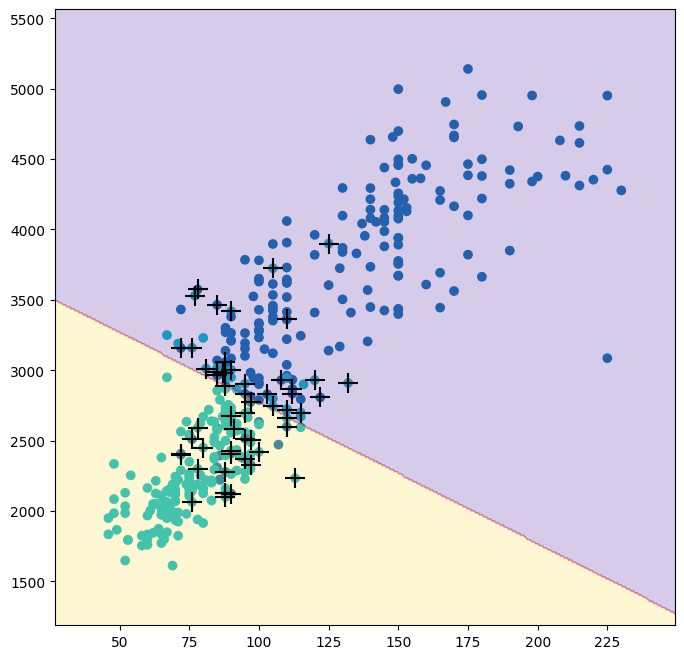

In [116]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_linear.fit(X,y),
features=[2, 3],
ax=ax)

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


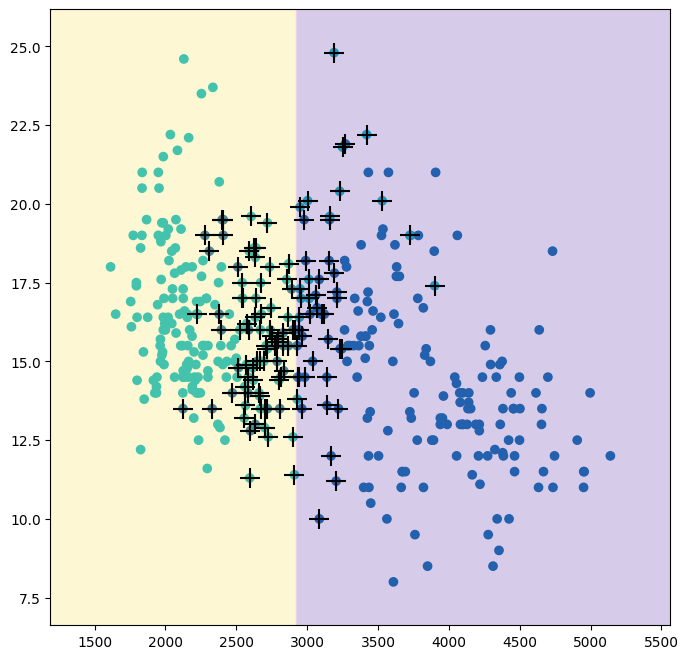

In [119]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
y,
svm_poly.fit(X,y),
features=[3, 4],
ax=ax)

The data largely appears relatively linearly seperable, which is why the linear SVM works best here 

# 8

This problem involves the OJ data set which is part of the ISLP
package.

### a

 Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.

In [145]:
oj_df = pd.read_csv('C:/Users/lucas/Documents/GitHub/ISLRv2/datasets/OJ.csv', index_col=0)

oj_df.loc[oj_df['Purchase'] == 'CH', 'Purchase'] = 1
oj_df.loc[oj_df['Purchase'] == 'MM', 'Purchase'] = 0

oj_df['Purchase'] = oj_df['Purchase'].astype(int)

X = oj_df.drop(columns=["Purchase", 'WeekofPurchase', 'StoreID', 'Store7', 'STORE'])
y = oj_df['Purchase']

print(y.dtypes)
display(oj_df)


int32


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,1,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,1,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,1,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,0,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,1,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,1,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1067,1,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,0,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1069,1,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [147]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = skm.train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Print the sizes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

print(y_train)

Training set size: 749 samples
Test set size: 321 samples
443     1
465     1
505     1
733     0
389     0
       ..
331     0
467     1
122     1
1045    1
861     1
Name: Purchase, Length: 749, dtype: int32


### b

Fit a support vector classifer to the training data using
C = 0.01, with Purchase as the response and the other variables
as predictors. How many support points are there?

In [149]:
## Decision Boundary is linear
## Support vectors are marked with the + 

svm_linear = SVC(C=.01, kernel='linear')
svm_linear.fit(X_train, y_train)

svm_linear.n_support_

array([289, 290])

There are 579 support points 

### c

 What are the training and test error rates?

In [153]:
y_train_hat = svm_linear.predict(X_train)
print(accuracy_score(y_train_hat, y_train))
display(confusion_table(y_train_hat, y_train))

0.636849132176235


Truth,0,1
Predicted,,
0,19,2
1,270,458


In [152]:
y_test_hat = svm_linear.predict(X_test)
print(accuracy_score(y_test_hat, y_test))
display(confusion_table(y_test_hat, y_test))

0.6261682242990654


Truth,0,1
Predicted,,
0,9,1
1,119,192


### d

Use cross-validation to select an optimal C. Consider values in
the range 0.01 to 10.

In [157]:
## Here we tune it using 5-fold CV, to find a proper value for C

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_linear,
{'C':[0.001,0.01,0.1,1,5,10]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
best_linear = grid.best_estimator_

### e

Compute the training and test error rates using this new value
for C.

In [158]:
y_train_hat = best_linear.predict(X_train)
print(accuracy_score(y_train_hat, y_train))
display(confusion_table(y_train_hat, y_train))

0.8451268357810414


Truth,0,1
Predicted,,
0,228,55
1,61,405


In [159]:
y_test_hat = best_linear.predict(X_test)
print(accuracy_score(y_test_hat, y_test))
display(confusion_table(y_test_hat, y_test))

0.8037383177570093


Truth,0,1
Predicted,,
0,89,24
1,39,169


### f

Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma.

In [ ]:
## Decision Boundary is linear
## Support vectors are marked with the + 

svm_rbf = SVC(C=.01, kernel='rbf')
svm_rbf.fit(X_train, y_train)

svm_rbf.n_support_
### 578 support points

array([289, 289])

In [162]:
y_train_hat = svm_rbf.predict(X_train)
print(accuracy_score(y_train_hat, y_train))
display(confusion_table(y_train_hat, y_train))

y_test_hat = svm_rbf.predict(X_test)
print(accuracy_score(y_test_hat, y_test))
display(confusion_table(y_test_hat, y_test))

0.6141522029372497


Truth,0,1
Predicted,,
0,0,0
1,289,460


0.6012461059190031


Truth,0,1
Predicted,,
0,0,0
1,128,193


In [163]:
## Here we tune it using 5-fold CV, to find a proper value for C

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
{'C':[0.001,0.01,0.1,1,5,10]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
best_rbf = grid.best_estimator_

y_train_hat = best_rbf.predict(X_train)
print(accuracy_score(y_train_hat, y_train))
display(confusion_table(y_train_hat, y_train))

y_test_hat = best_rbf.predict(X_test)
print(accuracy_score(y_test_hat, y_test))
display(confusion_table(y_test_hat, y_test))

0.8518024032042724


Truth,0,1
Predicted,,
0,228,50
1,61,410


0.8006230529595015


Truth,0,1
Predicted,,
0,88,24
1,40,169


Now for Polynomial

In [168]:
## Decision Boundary is linear
## Support vectors are marked with the + 

svm_poly = SVC(C=.01, kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)

svm_poly.n_support_
### 579 support points

array([289, 290])

In [169]:
y_train_hat = svm_poly.predict(X_train)
print(accuracy_score(y_train_hat, y_train))
display(confusion_table(y_train_hat, y_train))

y_test_hat = svm_poly.predict(X_test)
print(accuracy_score(y_test_hat, y_test))
display(confusion_table(y_test_hat, y_test))

0.6141522029372497


Truth,0,1
Predicted,,
0,0,0
1,289,460


0.6012461059190031


Truth,0,1
Predicted,,
0,0,0
1,128,193


In [170]:
## Here we tune it using 5-fold CV, to find a proper value for C

kfold = skm.KFold(5,
random_state=0,
shuffle=True)
grid = skm.GridSearchCV(svm_poly,
{'C':[0.001,0.01,0.1,1,5,10]},
refit=True,
cv=kfold,
scoring='accuracy')
grid.fit(X, y)
best_poly = grid.best_estimator_

y_train_hat = best_poly.predict(X_train)
print(accuracy_score(y_train_hat, y_train))
display(confusion_table(y_train_hat, y_train))

y_test_hat = best_poly.predict(X_test)
print(accuracy_score(y_test_hat, y_test))
display(confusion_table(y_test_hat, y_test))

0.842456608811749


Truth,0,1
Predicted,,
0,222,51
1,67,409


0.8037383177570093


Truth,0,1
Predicted,,
0,88,23
1,40,170


All of the methods perform similarly, achieving about 80% accuracy on testing data. Tuning of the gamma or degree parameters might yield better results for the radial and polynomial kernels. Striking to see the difference in performance when properly adjusting your C parameter. 